In [20]:
import sympy as sp
import numpy as np

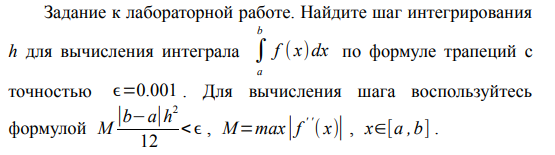
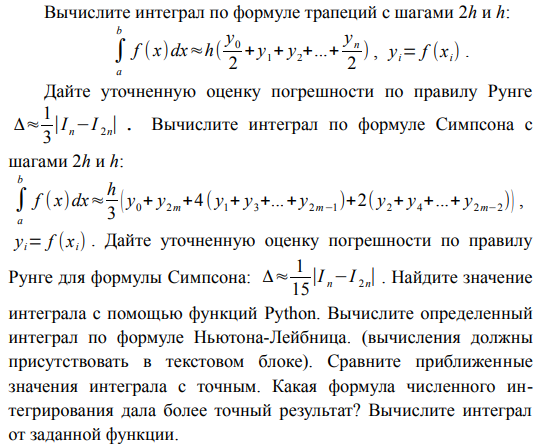

## Вычисления шага

In [21]:
def M_max(f, a, b):
    x = sp.Symbol("x")
    x_arr = np.linspace(a, b + 0.0000001, 1000)
    f2 = []
    for xi in x_arr:
        f2.append(np.abs(f.subs(x, xi).evalf()))
    return float(max(f2))

In [22]:
x = sp.symbols("x")

f = x * sp.acos(x)

a = -0.5
b = 0.5
epsilon = 0.001

f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
h = (b - a) / 4
M = M_max(f2, a, b)

while M*np.abs(b - a) * h ** 2 / 12 >= epsilon:
    h /= 4

print("Шаг интегрирования h =", h)

Шаг интегрирования h = 0.0625


## Формула трапеции

In [23]:
def trapezoidal_rule(f, h):
    int_trap = 0
    y = []
    for xi in np.arange(a, b + 0.0000001, h):
        y.append(f.subs(x, xi).evalf())

    for i in range(1, len(y) - 1):
        int_trap += y[i]

    int_trap += (y[0] + y[len(y) - 1])/2
    int_trap *= h
    return int_trap

In [24]:
I_h = trapezoidal_rule(f, h)
I_2h = trapezoidal_rule(f, 2*h)

print("In c шагом h =", I_h)
print("I2n c шагом 2h =", I_2h, "\n")
print("Оценка погрешности =", (1/3)*np.abs(I_h - I_2h))
print("Вычисленный интеграл:", "=", sp.integrate(f, (x, a, b)).evalf())
sp.Integral(f, (x, a, b))

In c шагом h = -0.0863232580894380
I2n c шагом 2h = -0.0884711317542418 

Оценка погрешности = 0.000715957888267958
Вычисленный интеграл: = -0.0856066570465349


Integral(x*acos(x), (x, -0.5, 0.5))

## Формула Симпсона

In [25]:
def simpsons_rule(f, h):
    int_simp = 0
    y = []
    for xi in np.arange(a, b + 0.0000001, h):
        y.append(f.subs(x, xi).evalf())

    for i in range(1, len(y) - 1, 2):
        int_simp += 4*y[i]

    for i in range(2, len(y) - 2, 2):
        int_simp += 2*y[i]

    int_simp += y[0] + y[len(y) - 1]
    int_simp *= h/3
    return int_simp

In [26]:
I_h_simpson = simpsons_rule(f, h)
I_2h_simpson = simpsons_rule(f, 2 * h)

print("С шагом h =", I_h_simpson)
print("С шагом 2h =", I_2h_simpson)
print("Оценка погрешности =", (1/15)*np.abs(I_h_simpson - I_2h_simpson))
print("Вычисленный интеграл:", "=", sp.integrate(f, (x, a, b)).evalf())
sp.Integral(f, (x, a, b))

С шагом h = -0.0856073002011701
С шагом 2h = -0.0856165493914733
Оценка погрешности = 6.16612686885990e-7
Вычисленный интеграл: = -0.0856066570465349


Integral(x*acos(x), (x, -0.5, 0.5))

## Формула Ньютона-Лейбница

In [27]:
def newton_leibniz_integral(f, a, b):
    F = sp.integrate(f, x)
    integral_value = F.subs(x, b) - F.subs(x, a)
    return integral_value

In [28]:
exact_integral_value = newton_leibniz_integral(f, a, b)
print(f"\nТочное значение интеграла: {exact_integral_value}")
f_newtone = sp.integrate(f, x)
f_newtone


Точное значение интеграла: -0.0856066570465349


x**2*acos(x)/2 - x*sqrt(1 - x**2)/4 - acos(x)/4